# <center>Breast Cancer Detection</center>


## Overview:
Breast cancer is when breast cells mutate and become cancerous cells that multiply and form tumors. Breast cancer typically affects women and people assigned female at birth (AFAB) age 50 and older, but it can also affect men and people assigned male at birth (AMAB), as well as younger women. Healthcare providers may treat breast cancer with surgery to remove tumors or treatment to kill cancerous cells.



## Dataset Information:

Wisconsin Dataset: [Kaggle - Breast Cancer Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)

### Independent Feature:
* Diagnosis: (Benign : Malignant :: 357 : 212)

### Dependent Features:

* Radius - Mean, Worst, Standard Error
* Texture - Mean, Worst, Standard Error
* Perimter - Mean, Worst, Standard Error
* Area - Mean, Worst, Standard Error
* Smoothness - Mean, Worst, Standard Error
* Compactness - Mean, Worst, Standard Error
* Concavity - Mean, Worst, Standard Error
* Concave Points - Mean, Worst, Standard Error
* Symmetry - Mean, Worst, Standard Error
* Fractural Dimension - Mean, Worst, Standard Error


### Training : Testing :: 455 : 114 :: 80 : 20

### Evaluation Metrics Considered:
* Accuracy, Precision, Recision, F1 Score, ROC AUC Curve

# 1. Importing Required Libraries

* NumPy: For numerical computations and array manipulation.
* Pandas: For data manipulation and analysis.
* Seaborn: For statistical data visualization.
* Matplotlib: For creating plots and visualizations.
* Scikit-learn: For machine learning algorithms and evaluation metrics.
* XGBoost: For Extreme gradient boosting machine learning.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, ClassificationPreset, DataQualityPreset

# 2. Data Ingestion

In [2]:
df = pd.read_csv(r"C:\Users\Kalyan\Desktop\OpenHealth\Notebook_Experiments\Data\cancerb.csv")

# 3. Data Exploration

In [3]:
pd.set_option('display.max_columns', None)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# 4. Data Preprocessing

### 4.1 Removing Unnecessary Features

In [10]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

### 4.2 Independent Feature Transformation

In [11]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

### 4.3 Feature Coorelation Matrix

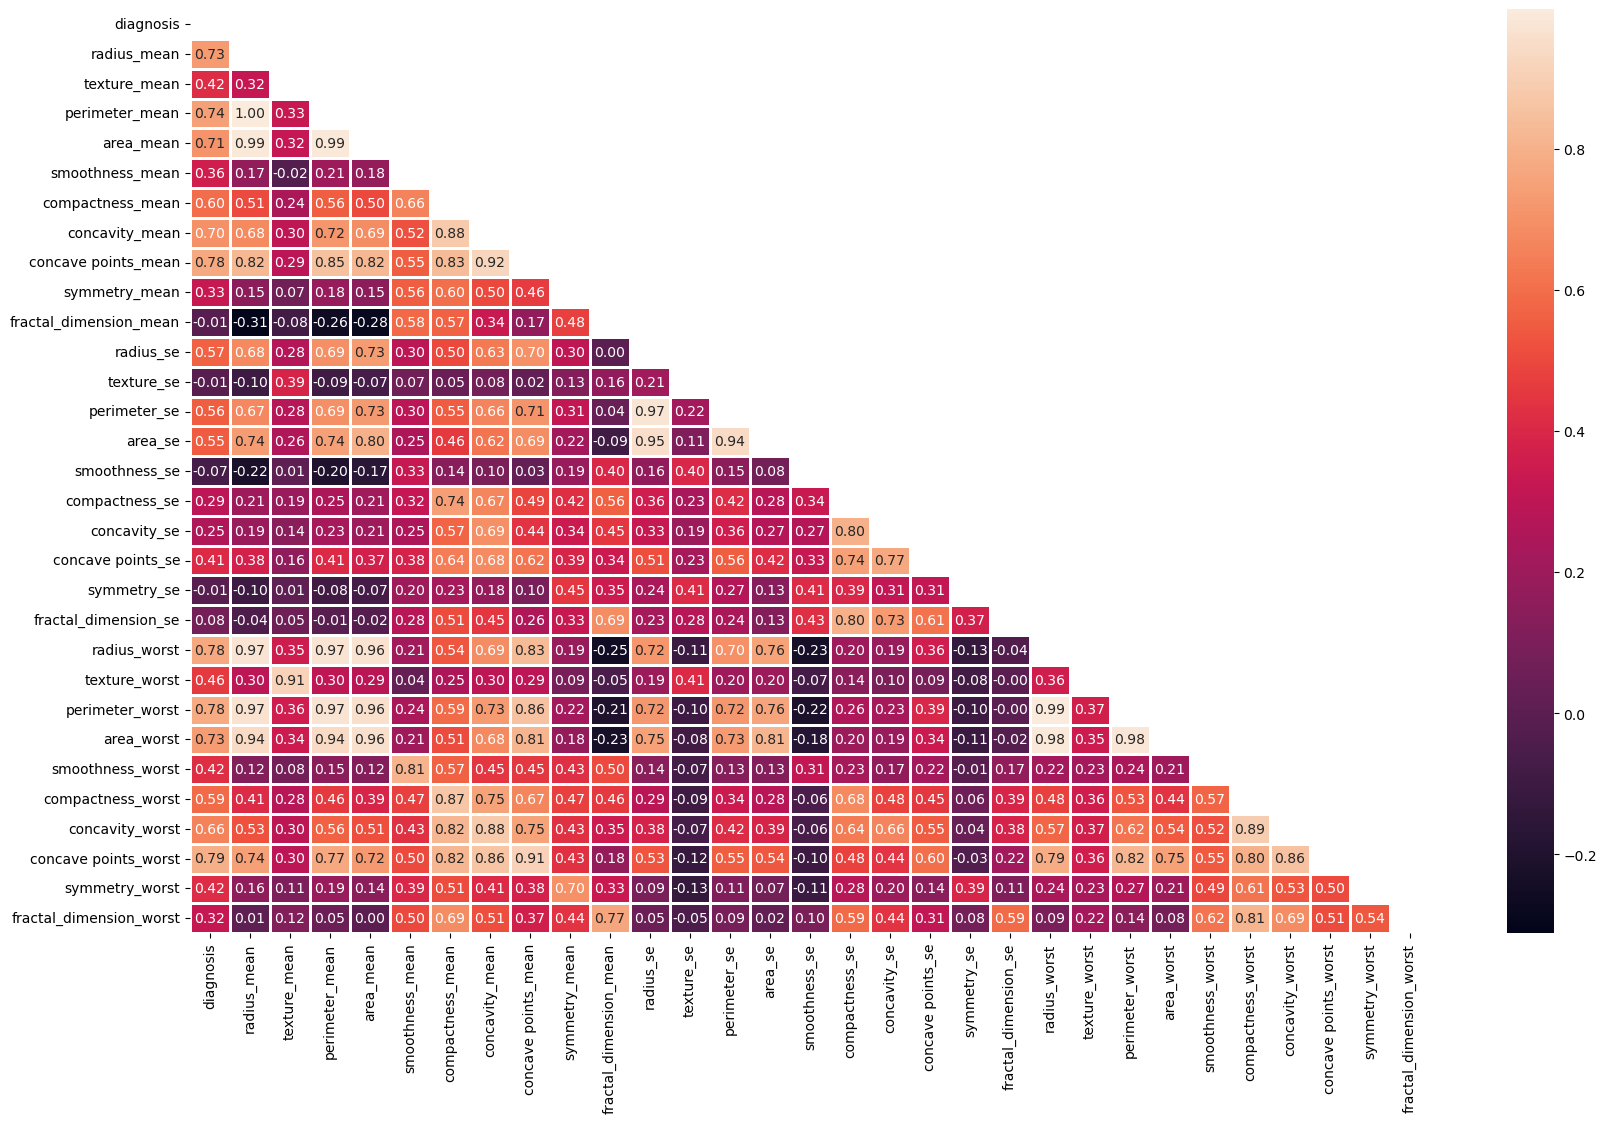

In [12]:
plt.figure(figsize = (20, 12))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### 4.4 Checking for Feature MultiCollinearity

In [13]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]
df = df.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [14]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

### 4.5 Feature Selection

In [15]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [16]:
X

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
X.columns

Index(['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
X.rename(columns={'concave points_mean': 'concave_points_mean',
                   'concave points_se': 'concave_points_se',
                   'concave points_worst': 'concave_points_worst'}, inplace=True)

### 4.5 Training and Testing Data Preparation

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(569, 22)
(455, 22)
(114, 22)
(569,)
(455,)
(114,)


### 4.6 Feature Scaling

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 5. Modelling

### 5.1 Model Training

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XG Boost': XGBClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

In [23]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []
roc_auc_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Specificity: {specificity}")
    print(f"ROC AUC Score: {roc_auc}")

    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    specificity_list.append(specificity)
    roc_auc_list.append(roc_auc)

    print("=" * 50)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1 Score: 0.9565217391304348
Specificity: 0.9850746268656716
ROC AUC Score: 0.9606224198158145
Model: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.9385964912280702
Precision: 0.9
Recall: 0.9574468085106383
F1 Score: 0.9278350515463918
Specificity: 0.9253731343283582
ROC AUC Score: 0.9414099714194983
Model: Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1 Score: 0.9565217391304348
Specificity: 0.9850746268656716
ROC AUC Score: 0.9606224198158145
Model: Support Vector Machine
Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9148936170212766
F1 Score: 0.9555555555555556
Specificity: 1.0
ROC AUC Score: 0.9574468085106382
Model: Naive Bayes
Training Accuracy: 0.9406593406593406
Testing Accu

In [24]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall (Sensitivity)': recall_list,
    'F1 Score': f1_list,
    'Specificity': specificity_list,
    'ROC AUC Score': roc_auc_list
}

results = pd.DataFrame(results).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)

results

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score,Specificity,ROC AUC Score
6,XG Boost,1.000000,0.982456,0.978723,0.978723,0.978723,0.985075,0.981899
7,Extra Trees Classifier,1.000000,0.973684,1.000000,0.936170,0.967033,1.000000,0.968085
3,Support Vector Machine,0.984615,0.964912,1.000000,0.914894,0.955556,1.000000,0.957447
0,Logistic Regression,0.989011,0.964912,0.977778,0.936170,0.956522,0.985075,0.960622
2,Random Forest,1.000000,0.964912,0.977778,0.936170,0.956522,0.985075,0.960622
5,Gradient Boosting,1.000000,0.956140,0.937500,0.957447,0.947368,0.955224,0.956335
1,Decision Tree,1.000000,0.938596,0.900000,0.957447,0.927835,0.925373,0.941410
4,Naive Bayes,0.940659,0.894737,0.872340,0.872340,0.872340,0.910448,0.891394


### 5.2 Hyper Parameter Tuning

In [25]:
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']},
    'Decision Tree': {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15, 20],'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 150, 200],'max_depth': [5, 10, 15, 20],'criterion': ['gini', 'entropy']},
    'Support Vector Machine': {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [50, 100, 150, 200],'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7, 9]},
    'XG Boost': {'learning_rate': [0.01, 0.1],'n_estimators': [50, 100, 150, 200],'max_depth': [3, 5, 7, 9]},
    'Extra Trees Classifier': {'n_estimators': [50, 100, 150, 200],'max_depth': [5, 10, 15, 20],'criterion': ['gini', 'entropy']}
}

In [26]:
modelss = []
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
specificities = []
roc_auc_scores = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)

        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"\nBest parameters for {model_name}: {best_params}")

        y_train_pred = best_model_cv.predict(x_train)
        y_pred = best_model_cv.predict(x_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        roc_auc = roc_auc_score(y_test, y_pred)

        modelss.append(model_name)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        specificities.append(specificity)
        roc_auc_scores.append(roc_auc)

        print(f"Train Accuracy for {model_name}: {train_accuracy}")
        print(f"Test Accuracy for {model_name}: {test_accuracy}")
        print(f"Precision for {model_name}: {precision}")
        print(f"Recall for {model_name}: {recall}")
        print(f"F1 Score for {model_name}: {f1}")
        print(f"Specificity for {model_name}: {specificity}")
        print(f"ROC AUC Score for {model_name}: {roc_auc}")
        print("=" * 50)

best_test_accuracy_index = test_accuracies.index(max(test_accuracies))
print(f"We got {modelss[best_test_accuracy_index]} as the model with the highest test accuracy of {test_accuracies[best_test_accuracy_index]}")


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Train Accuracy for Logistic Regression: 0.989010989010989
Test Accuracy for Logistic Regression: 0.9649122807017544
Precision for Logistic Regression: 0.9777777777777777
Recall for Logistic Regression: 0.9361702127659575
F1 Score for Logistic Regression: 0.9565217391304348
Specificity for Logistic Regression: 0.9850746268656716
ROC AUC Score for Logistic Regression: 0.9606224198158145

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Train Accuracy for Decision Tree: 0.989010989010989
Test Accuracy for Decision Tree: 0.956140350877193
Precision for Decision Tree: 0.9375
Recall for Decision Tree: 0.9574468085106383
F1 Score for Decision Tree: 0.9473684210526315
Specificity for Decision Tree: 0.9552238805970149
ROC AUC Score for Decision Tree: 0.9563353445538266

Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
Train Accuracy

In [27]:
results1 = {
    'Model': modelss,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall (Sensitivity)': recalls,
    'F1 Score': f1_scores,
    'Specificity': specificities,
    'ROC AUC Score': roc_auc_scores
}
results1 = pd.DataFrame(results1).sort_values(by=['Test Accuracy', 'Precision', 'Recall (Sensitivity)'], ascending=False)
results1

,Model,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),F1 Score,Specificity,ROC AUC Score
7,Extra Trees Classifier,1.000000,0.973684,1.000000,0.936170,0.967033,1.000000,0.968085
5,Gradient Boosting,1.000000,0.973684,0.978261,0.957447,0.967742,0.985075,0.971261
2,Random Forest,1.000000,0.964912,1.000000,0.914894,0.955556,1.000000,0.957447
0,Logistic Regression,0.989011,0.964912,0.977778,0.936170,0.956522,0.985075,0.960622
3,Support Vector Machine,0.991209,0.964912,0.957447,0.957447,0.957447,0.970149,0.963798
6,XG Boost,1.000000,0.964912,0.957447,0.957447,0.957447,0.970149,0.963798
1,Decision Tree,0.989011,0.956140,0.937500,0.957447,0.947368,0.955224,0.956335
4,Naive Bayes,0.940659,0.894737,0.872340,0.872340,0.872340,0.910448,0.891394


In [28]:
results1.to_csv("BCancer_Evaluation_Metrics.csv")

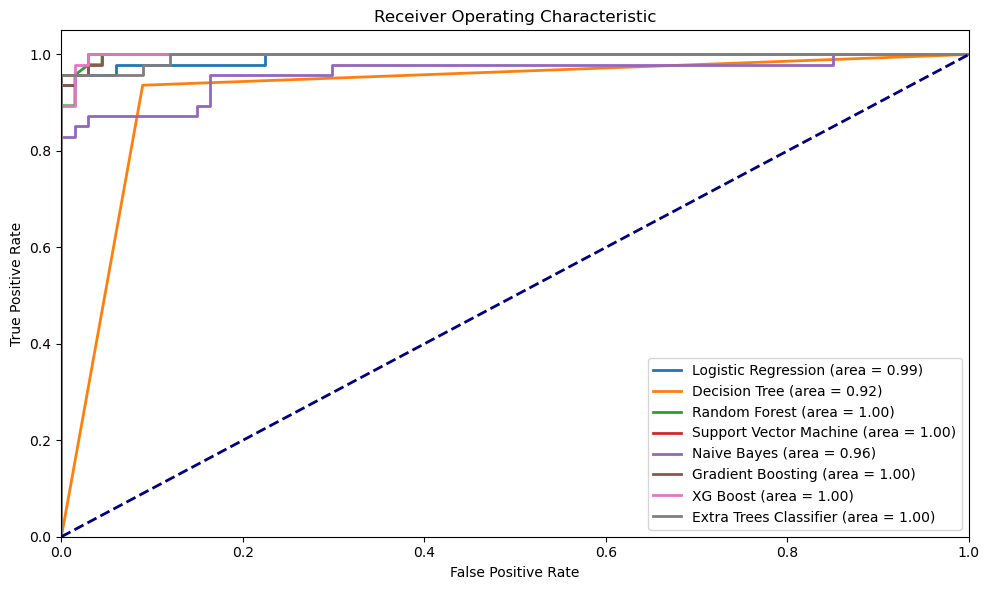

In [29]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [30]:
best_model = grid_search.best_estimator_
best_model

ExtraTreesClassifier(max_depth=10, n_estimators=150)

In [31]:
pickle.dump(best_model,open('BCancer_Model.pkl','wb'))
pickle.dump(scaler,open('BCancer_Preprocessor.pkl','wb'))

# 6. Model File Evaluation

In [32]:
model = pickle.load(open("BCancer_Model.pkl", "rb"))
processor = pickle.load(open("BCancer_Preprocessor.pkl", "rb"))
data = processor.transform([x_train[0]])
predictions = model.predict(data)
print(predictions)

[0]


# 7. Model Monitoring

### 7.1 Monitoring Data Preparation

In [33]:
target = 'diagnosis'
prediction = 'prediction'
numerical_features = ['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [34]:
column_mapping = ColumnMapping()
column_mapping.target = target
column_mapping.prediction = prediction
column_mapping.numerical_features = numerical_features

In [35]:
num_rows = int(len(df) * 0.70)

In [36]:
reference = df[:num_rows]
current = df[num_rows:]

In [37]:
classifier = ExtraTreesClassifier(max_depth=20, n_estimators=150)
classifier.fit(reference[numerical_features],reference[target])

ExtraTreesClassifier(max_depth=20, n_estimators=150)

In [38]:
ref_prediction = classifier.predict(reference[numerical_features])
cur_prediction = classifier.predict(current[numerical_features])

In [39]:
reference['prediction'] = ref_prediction
current['prediction'] = cur_prediction

### 7.2 Model Performance Monitoring

In [40]:
classifier_per = Report(metrics=[ClassificationPreset()])
classifier_per.run(current_data=reference, reference_data=None, column_mapping=column_mapping)

In [41]:
classifier_per.show()

In [42]:
classifier_per.save("Model_Performance_Metrics.json")

### 7.3 Data Drift Test

In [43]:
data_drift_report = Report(metrics=[DataDriftPreset()])
data_drift_report.run(reference_data=reference, current_data=current)

In [44]:
data_drift_report

In [45]:
data_drift_report.save("Data_Drift_Metrics.json")

### 7.4 Data Quality Test

In [46]:
data_quality_report = Report(metrics=[DataQualityPreset()])
data_quality_report.run(reference_data=reference, current_data=current)

In [47]:
data_quality_report

In [48]:
data_quality_report.save("Data_Quality_Metrics.json")

### 7.5 Target Feature Drift Test

In [49]:
num_target_drift_report = Report(metrics=[TargetDriftPreset()])
num_target_drift_report.run(reference_data=reference, current_data=current)

In [50]:
num_target_drift_report

In [51]:
num_target_drift_report.save("Target_Drift_Metrics.json")